In [1]:
from Train import *
from IPython import display
import pylab as pl
import time, os
import matplotlib.patches as patches
import tensorflow.compat.v1 as tf
tf.compat.v1.disable_eager_execution()

In [2]:
# 설정값 정의.
gridSize = 10
maxGames = 100
env      = CatchEnvironment(gridSize)
winCount = 0
lossCount = 0
numberOfGames = 0

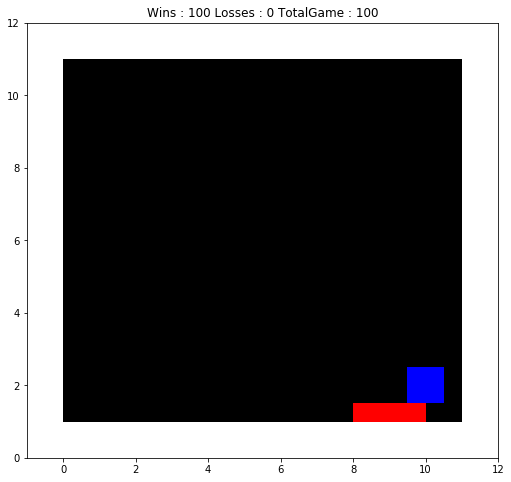

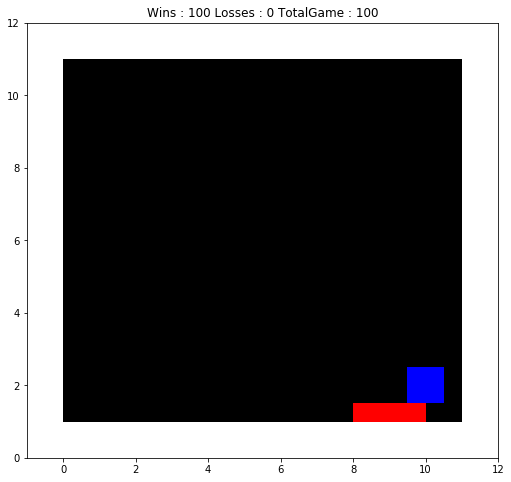

In [3]:
# 그래프 관련 설정.
ground = 1
plot   = pl.figure(figsize=(10, 8))
axis   = plot.add_subplot(111, aspect='equal')
axis.set_xlim([-1, 12])
axis.set_ylim([0, 12])

# 파라미터를 불어오기 위한 Saver 선언.
saver = tf.train.Saver()

# 현재 상태를 그리기 위한 DrawState 함수 정의.
def drawState(fruitRow, fruitCol, basket, gridSize) :
    # 과일 세로축 담기.
    fruitX = fruitCol
    # 과일 가로축 담기.
    fruitY = (gridSize - fruitRow + 1)
    # 승리 횟수, 패배 횟수, 전체 게임 횟수를 화면 상단에 출력.
    stateTitle = f'Wins : {winCount} Losses : {lossCount} TotalGame : {numberOfGames}'
    axis.set_title(stateTitle)
    
    # 배경, 과일, 바구니 그리기.
    for p in [
        # 배경 설정.
        patches.Rectangle(
            ((ground - 1), ground), 11, 10, facecolor = '#000000'
        ),
        # 바구니 설정.
         patches.Rectangle(
            (basket - 1, ground), 2, 0.5, facecolor = '#FF0000'
        ),
        # 과일 설정.
         patches.Rectangle(
            (fruitX - 0.5, fruitY - 0.5), 1, 1, facecolor = '#0000FF'
        )
    ]:axis.add_patch(p)
    
    # 화면 청소.
    display.clear_output(wait=True)
    # 새롭게 그리기.
    display.display(pl.gcf())
    
# 행동을 에측하며 그림 그리기.
with tf.Session() as sess :
    # 저장된 파라미터 불러오기.
    saver.restore(sess, 'model.ckpt')
    print('저장된 파라미터를 불러왔습니다.')
    
    # 지정된 횟수만큼 게임 반복.
    while numberOfGames < maxGames :
        # 진행 게임수 만큼 증가.
        numberOfGames += 1
        
        # 최초 게임 상태 설정.
        isGameOver = False 
        fruitRow, fruitCol, basket = env.reset()
        currentState = env.observe()
        drawState(fruitRow, fruitCol, basket, gridSize)
        
        # 1판이 종료될 때까지 반복.
        while isGameOver != True :
            # 현재 상태에서 q값이 가장 행위를 가져오기.
            q = sess.run(y_pred, feed_dict = {x : currentState} )
            action = q.argmax()
            
            # 행동을 수행하고 다음 상태로 넘어감.
            nextState, reward, gameOver, stateinfo = env.act(action)
            fruitRow = stateinfo[0]
            fruitCol = stateinfo[1]
            basket   = stateinfo[2]
            
            # 과일을 받아내면 winCount 1 증가.
            if reward == 1 :
                winCount += 1
            # 과일을 못 받아내면 lossCount 1 증가.
            elif reward == -1 :
                lossCount += 1
            
            # 다음 판으로 넘어가기 위한 설정.
            currentState = nextState
            isGameOver   = gameOver
            
            # 그리기.
            drawState(fruitRow, fruitCol, basket, gridSize)
            time.sleep(0.05)
                